# The Atoms of Computation

Below are notes from each section of the qiskit course documentation found on this page: https://learn.qiskit.org/course/introduction/the-atoms-of-computation

## Introduction

In order to understand a quantum program and quantum computing, we'll first look at the basic principles of traditional devices. This will help us compare against and then understand quantum computers.

## Splitting information into bits

<font color=orange>A **bit** is the smallest unit of information that a classical computer can hold and it can store either a 0 or 1.</font> Using bits, computers can store numbers using the binary system. For example:

213 = (**1** x 2^7) + (**1** x 2^6) + (**0** x 2^5) + (**1** x 2^4) + (**0** x 2^3) + (**1** x 2^2) + (**0** x 2^1) + (**1** x 2^0)

213 = 11010101

In [8]:
# We can verify the binary string above using the bin function in python
bin(213)

'0b11010101'

In [9]:
# We can also get back the decimal representation of a binary using int
int('11010101', base=2)

213

The `11010101` string is known as a binary string and can be used to represent more than just numbers (although we'll ignore other uses of it for now). Quantum computers use the same basic idea except they use _qubits_, which will be defined later. For now, we'll treat them just as bits.

If you have `n` bits, you could write down `2^n` different numbers because each bit has 2 possible states (0 or 1). In comparison to the decimal system, if you have `n` bits, you could write down 10^n different numbers so we can see that the decimal system.

## Circuit diagrams

<font color=orange>**Circuit diagrams** are representations of the process of manipulating input bits into an output.</font> The diagrams show the inputs on the left and outputs on the right. Classical circuit diagrams have operations (or gates) represented by arcane symbols. A quantum circuit is siimilar but has different conventions for representing the inputs, outputs, and symbols used for operations.

## Creating circuits with `Qiskit`

To start, we need to import the `QuantumCircuit` class and instantiate a new `QuantumCircuit` object for which we will define the number of qubits and, optionally, the number of classical bits which are usedto store the measurements of qubits.

In [10]:
from qiskit import QuantumCircuit

## Your first quantum circuit

In a typical circuit, it will need to be able to do 3 jobs: 1) encode the input, 2) do some actual computation, and 3) extract an output. This circuit will just focus on the last of the 3 jobs.

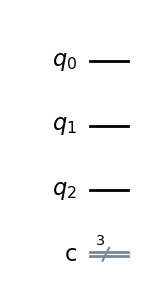

In [11]:
# Create quantum circuit with 3 qubits and 3 classical bits
# (we'll explain why we need the classical bits later)
qc = QuantumCircuit(3, 3)
qc.draw()

The circuit has no gates/operations so it simply shows our 3 qubits (top 3 lines) and our 3 classical bits (on the bottom). But now tell our quantum computer to measure our qubits and record the results.

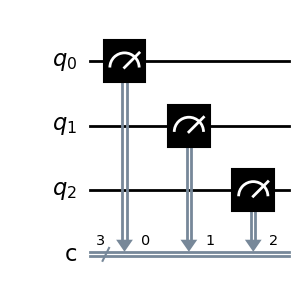

In [12]:
# measure qubits 0, 1, and 2 to classical bits 0, 1, and 2 respectively
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw()

Now that we've defined our circuit, we want to see what the output results of running it would be. To do this, we'll use a <font color=orange>**quantum simulator**, which is a standard computing calculating what an ideal quantum computer would do</font>. Classical computers do not simulate quantum algorithms very efficiently so we can only do this for up to a small number of qubits (~30). Qiskit's simulator is called Aer andd we can import it and set it as our backend.

In [13]:
from qiskit import Aer
sim = Aer.get_backend('aer_simulator')  # make new simulator object

**Note: This cell above differs from the tutorial as the tutorials code did not work due to being an older version of the package.**

The simulator can be run using the simulators `.run` method which will return a job containing information about the experiment such as whether it is currently running or complete, the backend it ran on, and the results of the experiment. We can retrieve the results using the `.results` and can view those results as a dictionary of counts.

In [14]:
job = sim.run(qc)       # run the experiment
result = job.result()   # get the results
result.get_counts()     # view the results as a dictionary of counts

{'000': 1024}

Due to the randomness of results, quantum computers often run circuits multiple times. Here we see it ran 1024 times which is the default number. By default, qubits always start in state 0 so we will always get back state `000` for our 3 qubits in this circuit.

### Encoding an input

We can encode our binary strings as inputs to our circuit. To do this, we can apply the NOT gate on our qubits to flip specific ones from 0 to 1. For qubits, this operation is known as the **X-gate** (the name of which will be explained later).

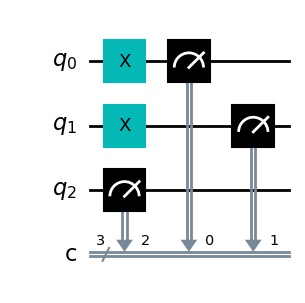

In [15]:
# create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x([0, 1])       # Perform X-gates on qubits 0 & 1
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw()

In [16]:
job = sim.run(qc)
result = job.result()
result.get_counts()

{'011': 1024}

<font color=orange>**Note here that the binary string encode, 011, was the result of flipping qubits 0 and 1 (_not qubits 1 and 2_), meaning that the string is encoded from bottom up on our circuit diagram**

## Creating an adder circuit

Just as decimal numbers are added column-wise from the smallest place (right most digit) to the largest place (left most digit), so is adding binary numbers. The rules are mostly the same where 0 + 0 is 0, 0 + 1  = 1, 1 + 0 = , and 1 + 1 = 10 where the result is a 0 that column but a 1 is carried over to the next column and added to those values. If the next column also has 2 1's, 1 + 1 + 1 = 11 where the result for that column is a 1 and a 1 is also carried to the next column. This covers all possible situations and thus binary numbers can be added like this for all columns.

The four basic sums shown below are called a half adder:

0+0 = 00<br>
0+1 = 01<br>
1+0 = 01<br>
1+1 = 10<br>

We can analyze the pattern of the half adder and see that the right-most digit is determined by whether the inputs are the same or different (same is 0, different is 1). This is known as an exlusive or gate (XOR) in classical computing and a controlled-NOT gate on a quantum computer. Indicating a control qubit and a target qubit, the CNOT gate acts by flipping the target only qubit if the control is 1. It can be applied using the `.cx` method as shown below:

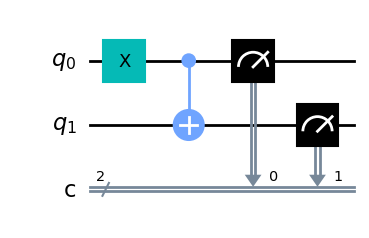

Result:  {'11': 1024}


In [17]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
display(qc.draw())     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

For our circuit, we don't want to flip/change/alter our inputs so we use our inputs as controls and additional qubits in our circuit as the targets. Therefore, we can implement q0 XOR q1 using two CNOTs acting on our read-out qubit (qr) initialized in state 0. If q0 and q1 are both 0, then qr never gets flipped and stays in 0. If q0 and q1 are both 1 then qr will get flipped twice, 0 to 1 and then 1 back to 0, resulting in 0 again. However, if only one of the two input qubits is 1 then qr gets flipped once and will result in 1 which is what we want. 

The last thing we need to do for our half adder is to look at the case of the left most output digit. We see from below that the left digit is only flipped to 1 if both inputs are 1.

0+0 = 00<br>
0+1 = 01<br>
1+0 = 01<br>
1+1 = 10<br>

For this case, we want a Toffoli gate (or a CCX for the double control) which only flips the target qubit if the 2 control qubits are _both_ 1s. This is basically and AND gate in the classical world.

Now we can construct our half-adder circuit!

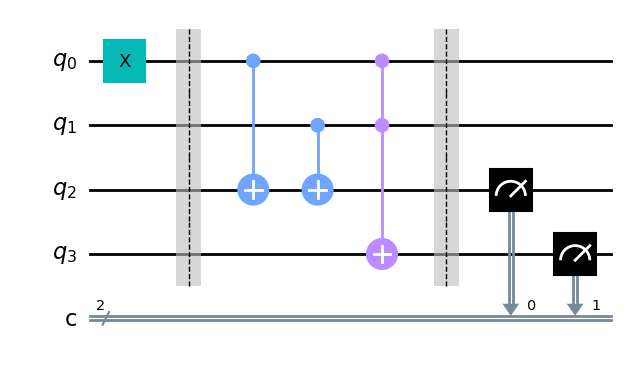

In [20]:
half_adder_qc = QuantumCircuit(4, 2)

# First, lets incode the inputs 1 and 0
half_adder_qc.x(0)
half_adder_qc.barrier() # mark the end of the encoding part of the circuit

# Next, it should carry out the adder circuit
half_adder_qc.cx(0, 2)
half_adder_qc.cx(1, 2)
half_adder_qc.ccx(0, 1, 3)
half_adder_qc.barrier() # mark the end of the computation part of the circuit

# Finally, measure the bottom two qubits
half_adder_qc.measure(2, 0)
half_adder_qc.measure(3, 1)
half_adder_qc.draw()

In [21]:
job = sim.run(half_adder_qc)
result = job.result()
result.get_counts()

{'01': 1024}